# Problem Statement:
**A cloth manufacturing company is interested to know about the segment or attributes causes high sale.  
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.** 

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the csv file containing data
data = pd.read_csv("Company_Data.csv",encoding='latin1', error_bad_lines = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


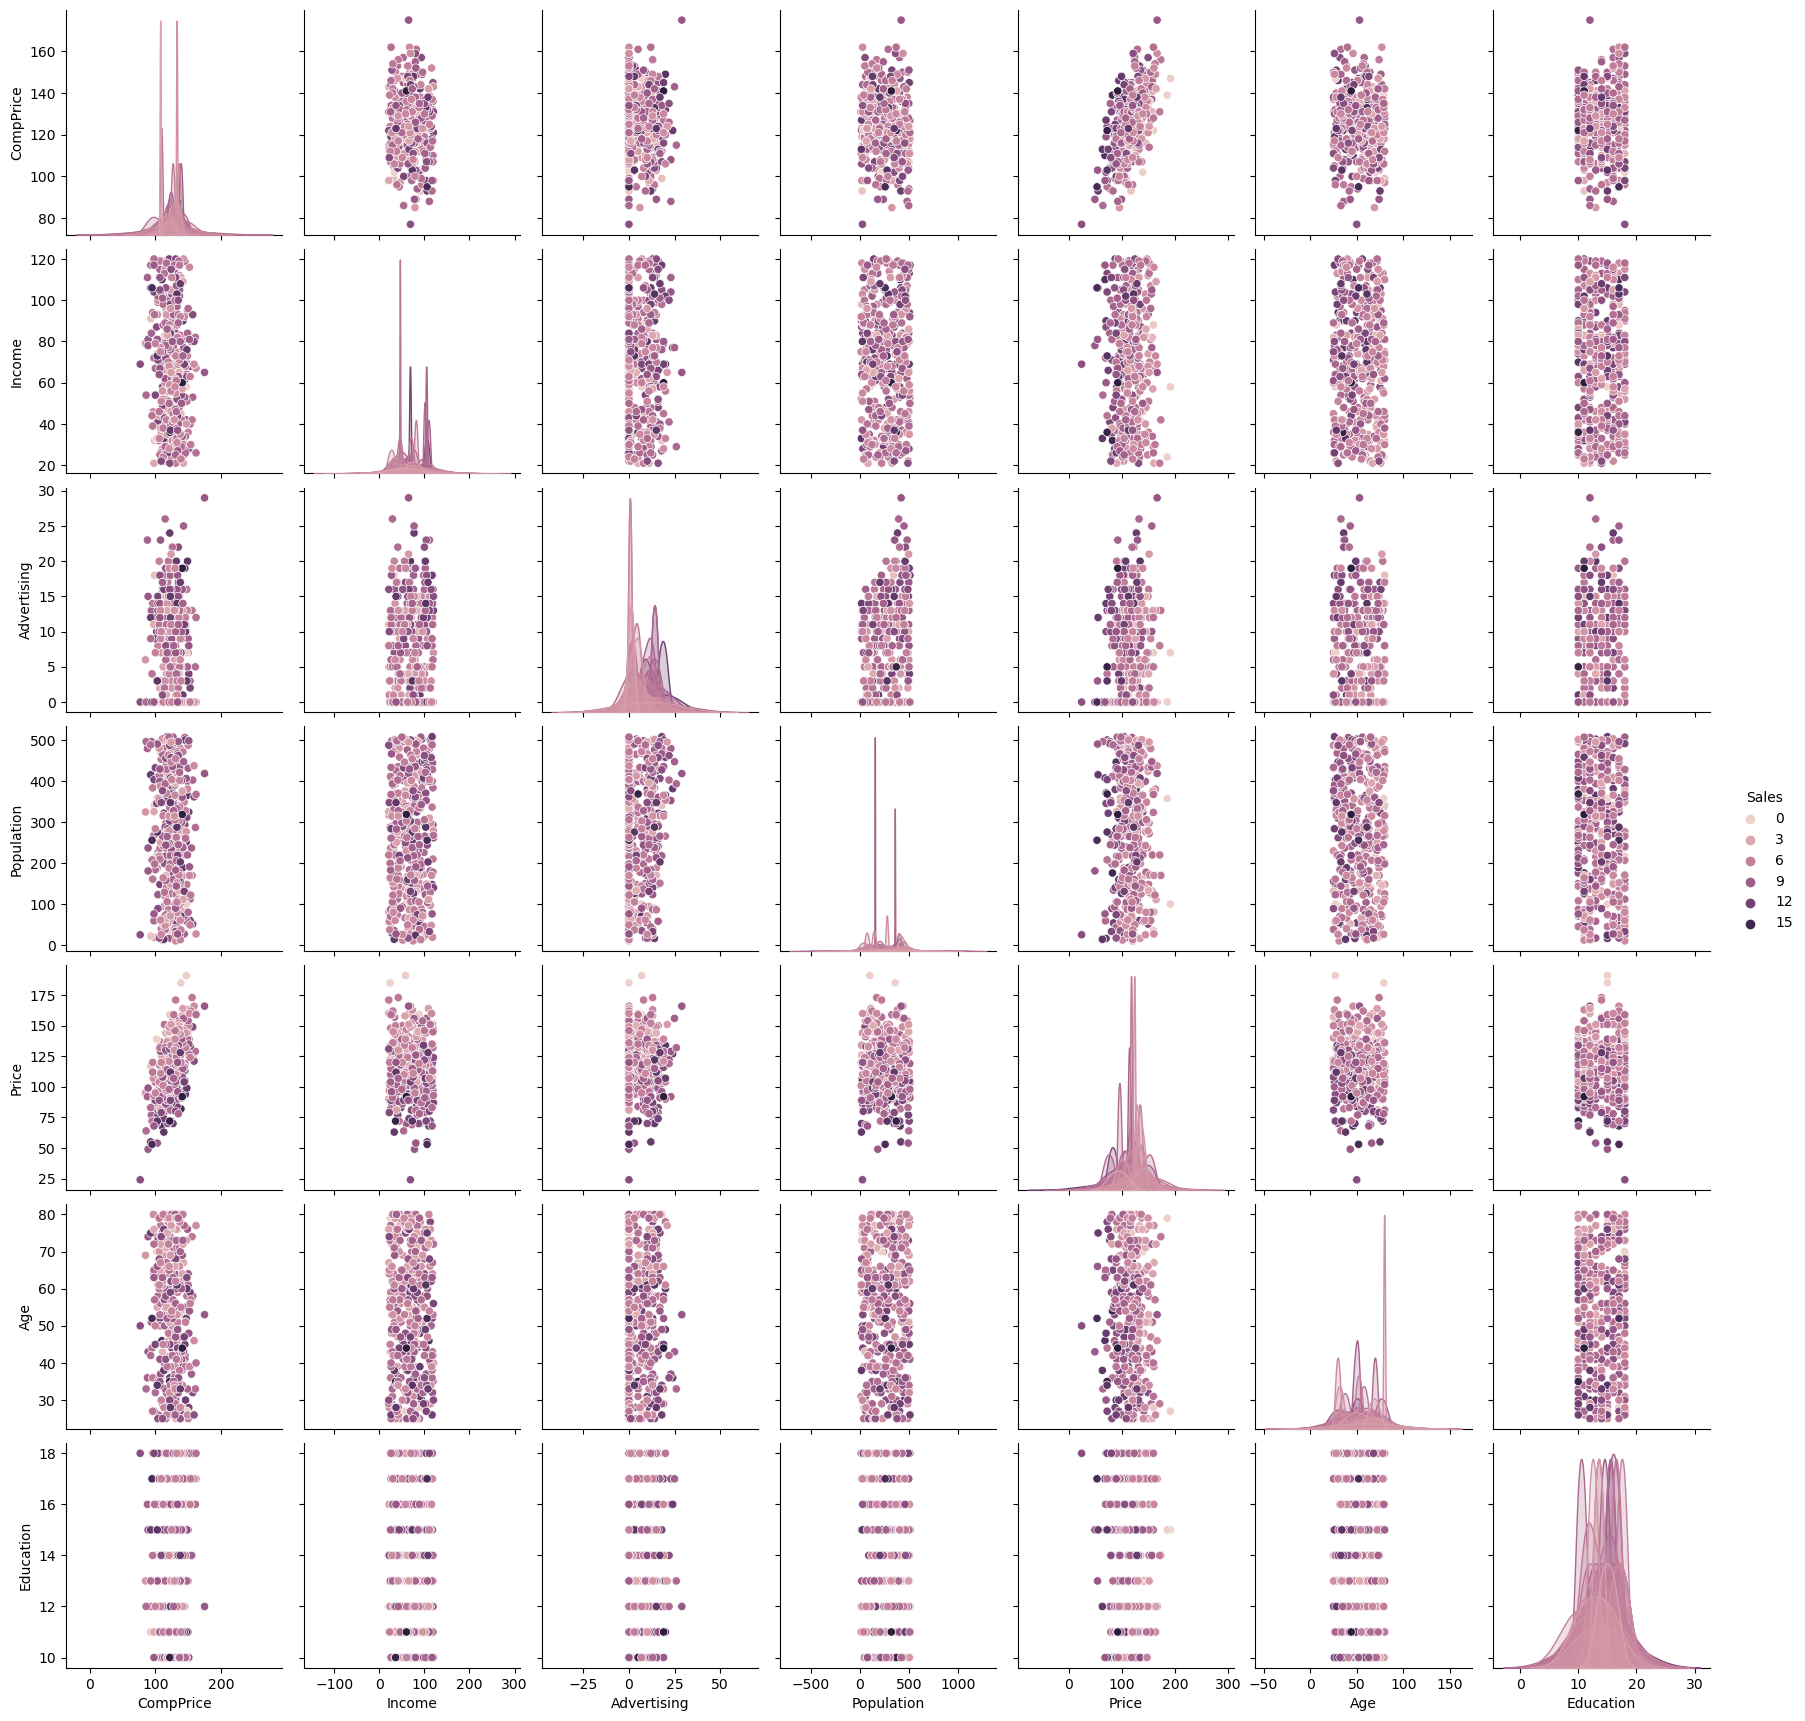

In [5]:
sns.pairplot(data, hue = "Sales")
plt.show()

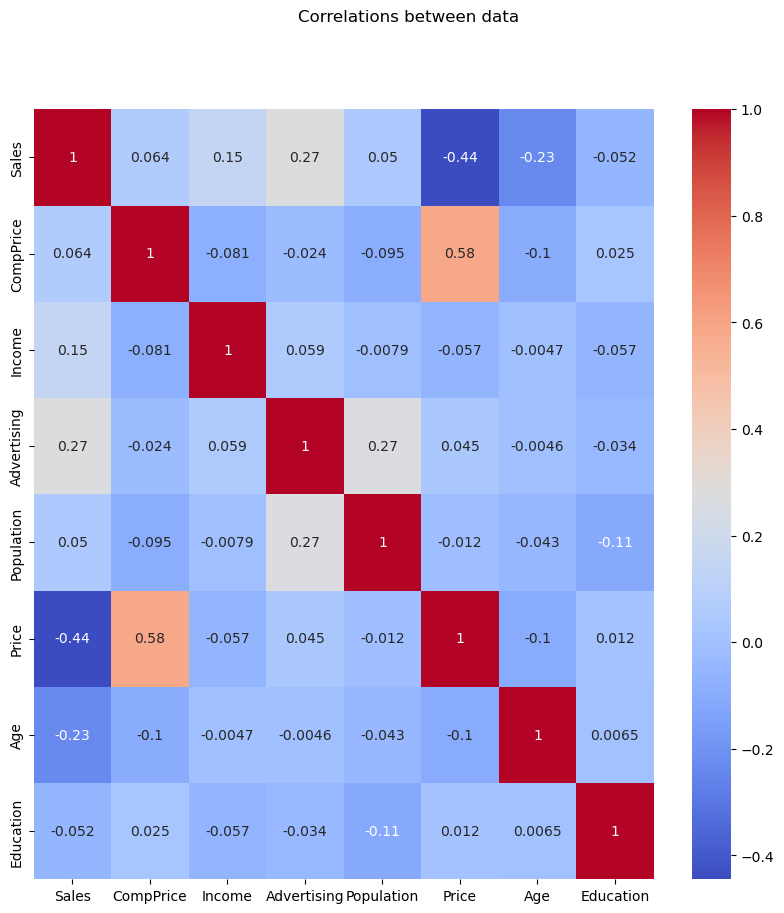

In [6]:
fig, ax = plt.subplots(figsize=(10,10))
# Plot the heatmap using seaborn's heatmap function
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)
# Set a title for the figure
fig.suptitle('Correlations between data')
# Display the heatmap
plt.show()

In [7]:
df = data.iloc[:,1:11]
target = data.Sales

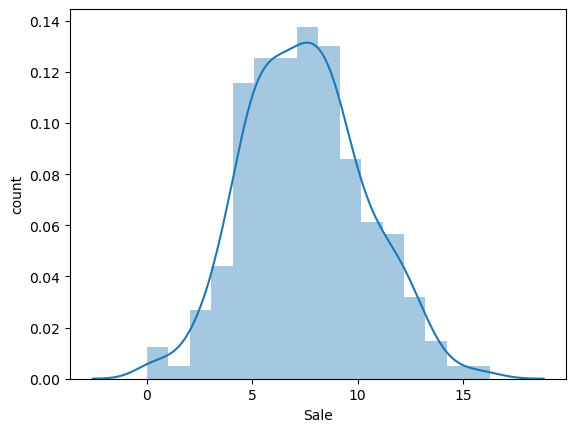

Skewness:  0.18556036318721578
Kurtosis:  -0.08087736743346197
Mean:  7.496325


In [8]:

sns.distplot(target)
plt.xlabel("Sale")
plt.ylabel("count")
plt.show()
print("Skewness: ", target.skew())
print("Kurtosis: ", target.kurt())
print("Mean: ", target.mean())

In [9]:
data.groupby("Sales").mean().reset_index()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
0,0.00,139.0,24.0,0.0,358.0,185.0,79.0,15.0
1,0.16,102.0,33.0,0.0,217.0,139.0,70.0,18.0
2,0.37,147.0,58.0,7.0,100.0,191.0,27.0,15.0
3,0.53,122.0,88.0,7.0,36.0,159.0,28.0,17.0
4,0.91,93.0,91.0,0.0,22.0,117.0,75.0,11.0
...,...,...,...,...,...,...,...,...
331,13.91,110.0,110.0,0.0,408.0,68.0,46.0,17.0
332,14.37,95.0,106.0,0.0,256.0,53.0,52.0,17.0
333,14.90,139.0,32.0,0.0,176.0,82.0,54.0,11.0
334,15.63,122.0,36.0,5.0,369.0,72.0,35.0,10.0


In [10]:
# converting sales from continous to catagorical varible
sales = []
for sale in data.Sales:
    if sale<7.49:
         sales.append("small")
    else:
        sales.append("large")
data["sales"] = sales

In [11]:
data.drop("Sales", axis = 1, inplace = True)

In [12]:
data.sales.info

<bound method Series.info of 0      large
1      large
2      large
3      small
4      small
       ...  
395    large
396    small
397    small
398    small
399    large
Name: sales, Length: 400, dtype: object>

In [13]:
data.sales.value_counts()

large    201
small    199
Name: sales, dtype: int64

In [14]:
le = preprocessing.LabelEncoder()
data.sales = le.fit_transform(data.sales)
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,0
1,111,48,16,260,83,Good,65,10,Yes,Yes,0
2,113,35,10,269,80,Medium,59,12,Yes,Yes,0
3,117,100,4,466,97,Medium,55,14,Yes,Yes,1
4,141,64,3,340,128,Bad,38,13,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,0
396,139,23,3,37,120,Medium,55,11,No,Yes,1
397,162,26,12,368,159,Medium,40,18,Yes,Yes,1
398,100,79,7,284,95,Bad,50,12,Yes,Yes,1


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for col in data.columns:
    if data[col].dtype in ["int64", "float64"]:
        data[col] = scaler.fit_transform(data[[col]])

In [16]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,0.850455,0.155361,0.657177,0.075819,0.177823,Bad,-0.699782,1.184449,Yes,Yes,0
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,Good,0.721723,-1.490113,Yes,Yes,0
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,Medium,0.350895,-0.725953,Yes,Yes,0
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,Medium,0.103677,0.038208,Yes,Yes,1
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,Bad,-0.947000,-0.343872,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,Good,-1.256023,0.038208,Yes,Yes,0
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,Medium,0.103677,-1.108033,No,Yes,1
397,2.417512,-1.526151,0.807733,0.700853,1.827078,Medium,-0.823391,1.566529,Yes,Yes,1
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,Bad,-0.205346,-0.725953,Yes,Yes,1


In [27]:
# transformation of catagorical variables using lable encoder
for col in data.columns:
    if data[col].dtype=="object":
        data[col] = le.fit_transform(data[[col]])

In [28]:
data

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,0.850455,0.155361,0.657177,0.075819,0.177823,0,-0.699782,1.184449,1,1,0
1,-0.912484,-0.739060,1.409957,-0.032882,-1.386854,1,0.721723,-1.490113,1,1,0
2,-0.781896,-1.204159,0.506621,0.028262,-1.513719,2,0.350895,-0.725953,1,1,0
3,-0.520720,1.121336,-0.396715,1.366649,-0.794814,2,0.103677,0.038208,1,1,1
4,1.046337,-0.166631,-0.547271,0.510625,0.516132,0,-0.947000,-0.343872,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
395,0.850455,1.407551,1.560513,-0.420131,0.516132,1,-1.256023,0.038208,1,1,0
396,0.915749,-1.633482,-0.547271,-1.547909,0.177823,2,0.103677,-1.108033,0,1,1
397,2.417512,-1.526151,0.807733,0.700853,1.827078,2,-0.823391,1.566529,1,1,1
398,-1.630719,0.370022,0.054953,0.130170,-0.879391,0,-0.205346,-0.725953,1,1,1


In [29]:
X = data.iloc[:,:10]
Y = data.sales
Y

0      0
1      0
2      0
3      1
4      1
      ..
395    0
396    1
397    1
398    1
399    0
Name: sales, Length: 400, dtype: int32

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state = 42)

# model building

In [40]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

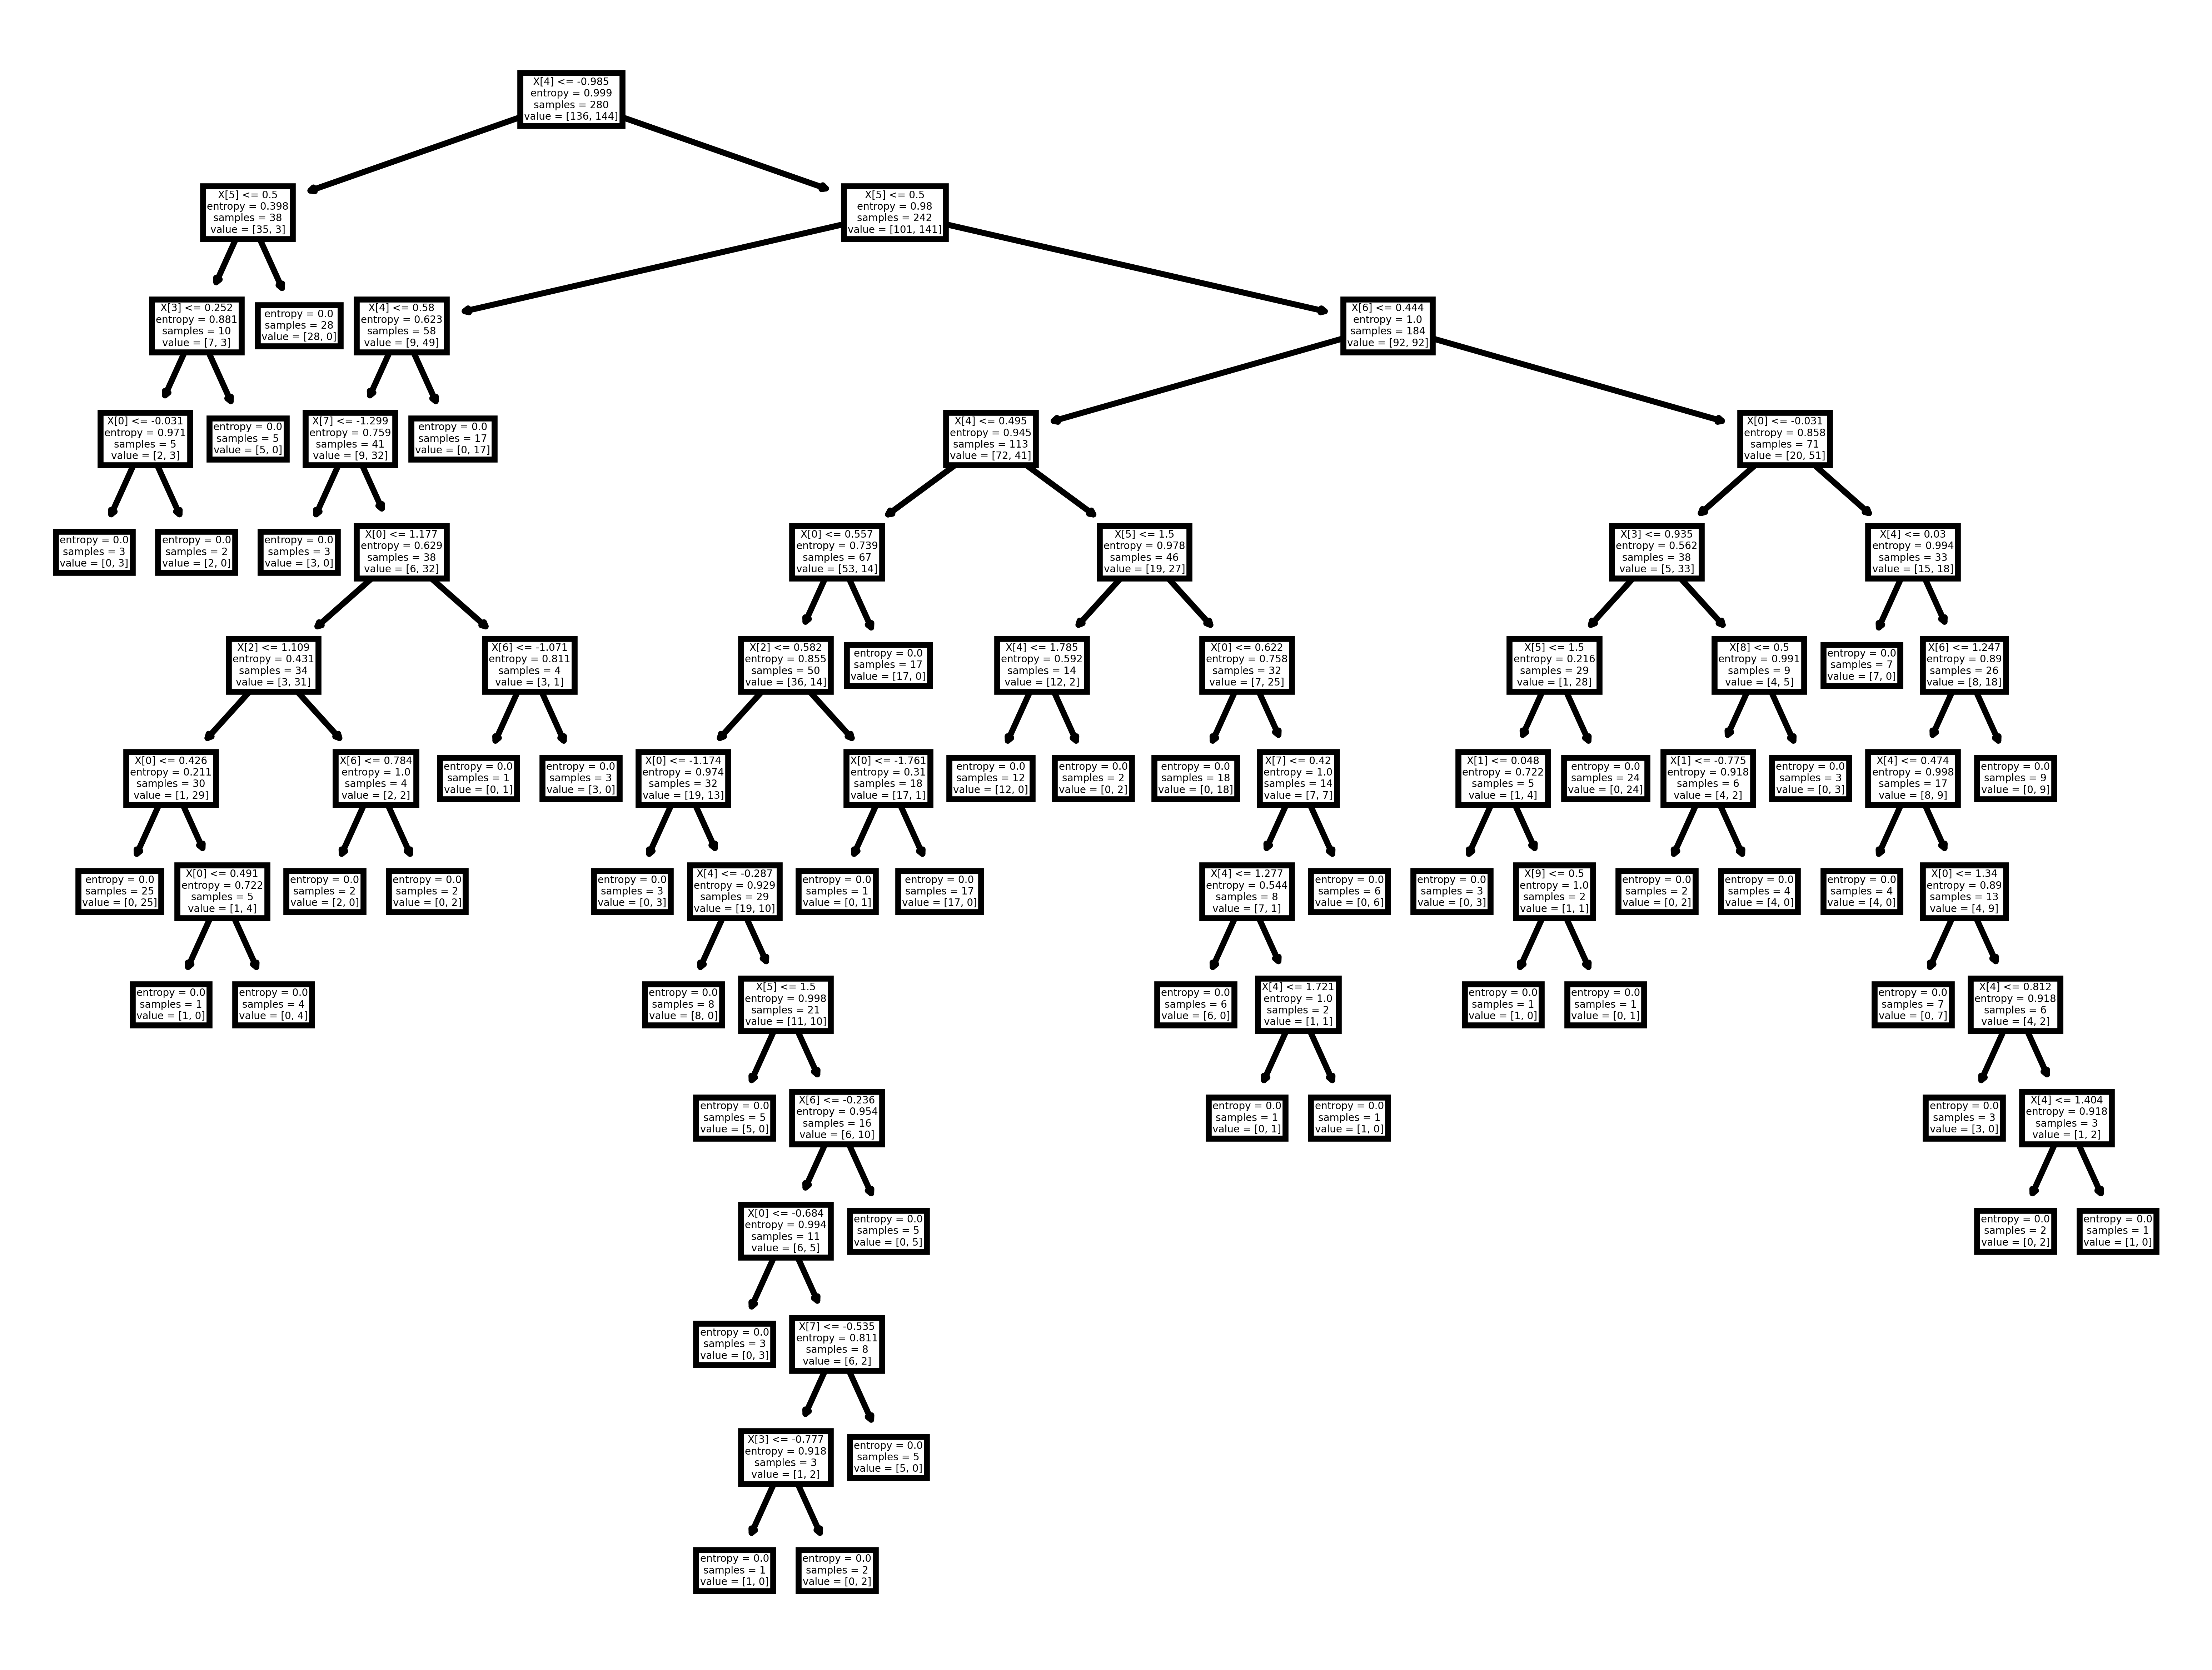

In [41]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model)
plt.show()

In [42]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
preds

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

# model evaluation

In [43]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        65
           1       0.71      0.71      0.71        55

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120



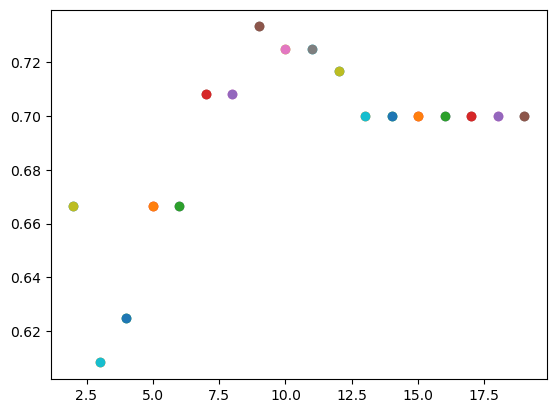

In [148]:
# finding max_depth
max_depth = list(range(2,20))
Accu = []
for value in max_depth:
    model = DecisionTreeClassifier(criterion = 'entropy',max_depth = value, random_state = 42)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    Accu.append(acc)
    plt.scatter(x= value, y = acc)
plt.show()

In [149]:
model_final = DecisionTreeClassifier(criterion = 'entropy',max_depth = 9, random_state = 42)
model_final.fit(x_train,y_train)
y_pred = model_final.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        65
           1       0.71      0.71      0.71        55

    accuracy                           0.73       120
   macro avg       0.73      0.73      0.73       120
weighted avg       0.73      0.73      0.73       120



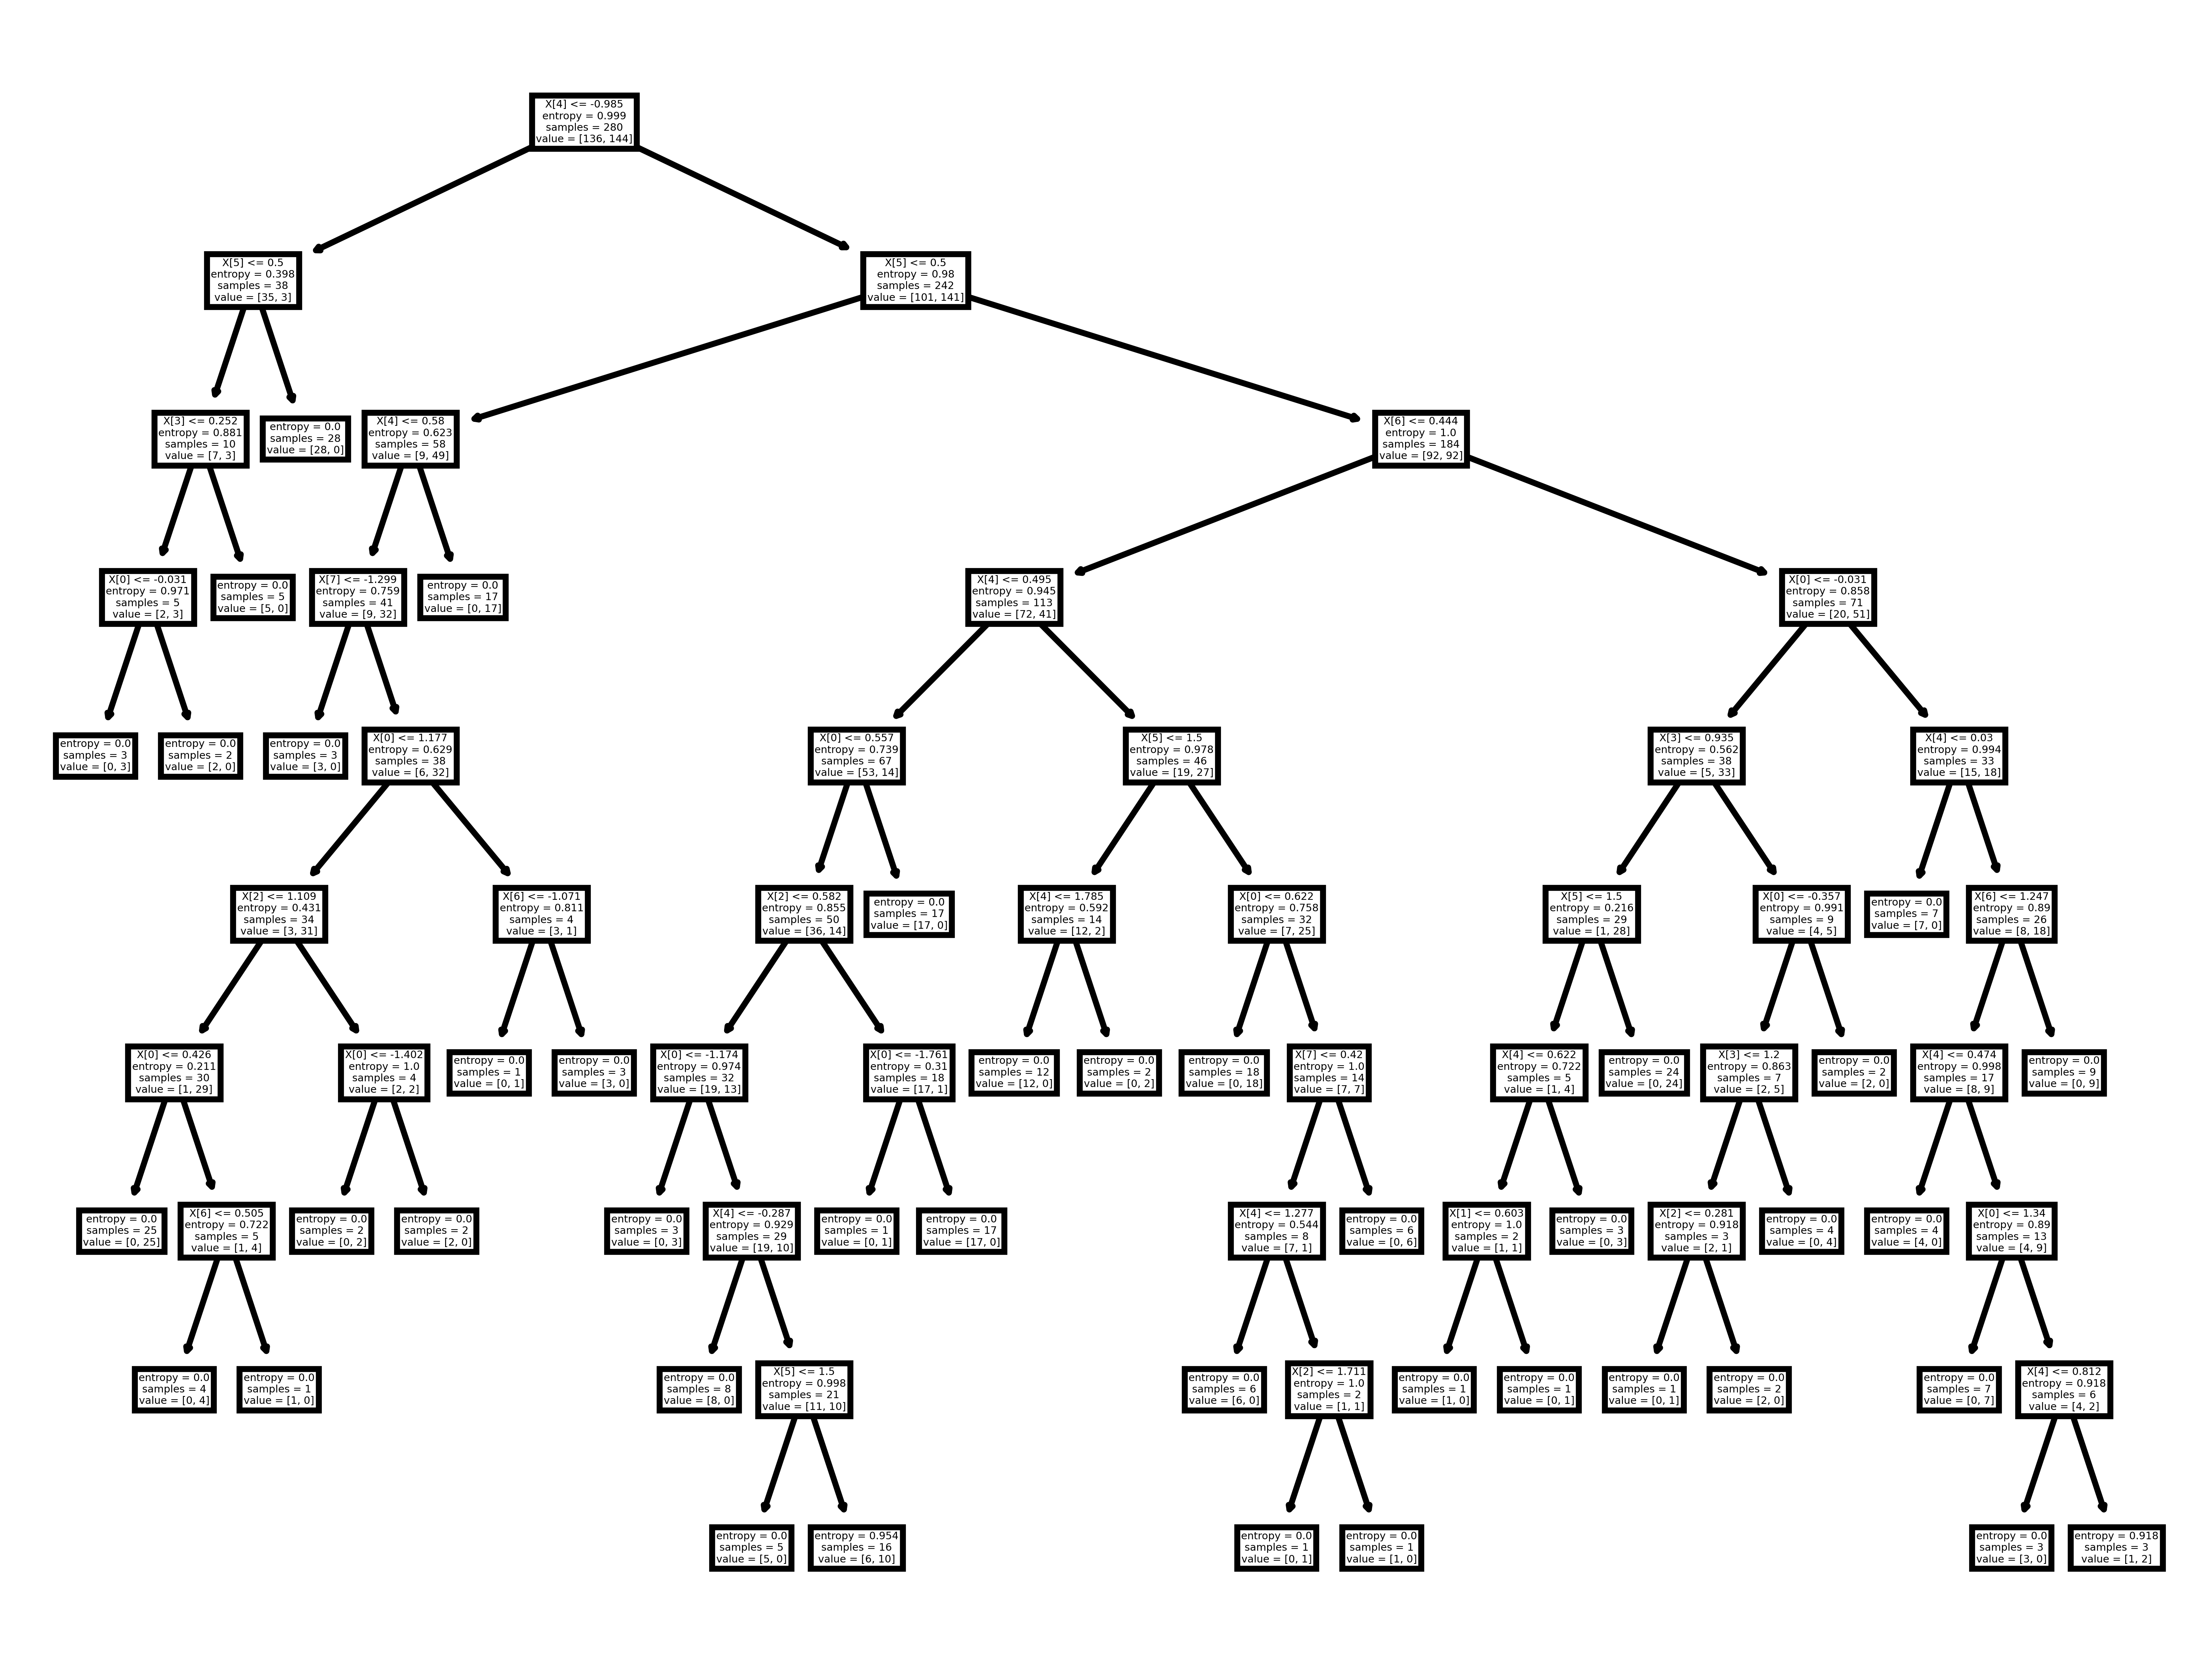

In [151]:
#PLot the decision tree
plt.figure(dpi=1200)
tree.plot_tree(model_final)
plt.show()